In [1]:
import numpy as np
import scipy.io
import matplotlib.pyplot as plt
from scipy.linalg import eigh

# Small graph
# 1. Simple graph: Define adjacency matrix
AdjMatrix = np.array([[0, 1, 1, 0],
                      [1, 0, 0, 1],
                      [1, 0, 0, 1],
                      [0, 1, 1, 0]])

print("Adjacency Matrix:")
print(AdjMatrix)

Adjacency Matrix:
[[0 1 1 0]
 [1 0 0 1]
 [1 0 0 1]
 [0 1 1 0]]


In [5]:
# 2. Find the row sums of the matrix AdjMatrix
RowSums = np.sum(AdjMatrix, axis=1)
print("\nRow Sums:")
print(RowSums)



Row Sums:
[2 2 2 2]


In [6]:
# 3. Compute the Laplacian of the graph
LaplaceGraph = np.diag(RowSums) - AdjMatrix
print("\nLaplacian Matrix:")
print(LaplaceGraph)

# Check if LaplaceGraph is singular
test_vector = np.ones(len(LaplaceGraph))
singularity_check = LaplaceGraph @ test_vector
print("\nSingularity Check (Laplacian * ones):")
print(singularity_check)



Laplacian Matrix:
[[ 2 -1 -1  0]
 [-1  2  0 -1]
 [-1  0  2 -1]
 [ 0 -1 -1  2]]

Singularity Check (Laplacian * ones):
[0. 0. 0. 0.]


In [7]:
# 4. Find eigenvalues and eigenvectors using the eig function
D, V = np.linalg.eig(LaplaceGraph)

# Sort the eigenvalues and eigenvectors
d, ind = np.argsort(D), np.argsort(D)
D = np.diag(D[ind])
V = V[:, ind]

print("\nEigenvalues (sorted):")
print(np.diag(D))
print("\nEigenvectors (sorted):")
print(V)



Eigenvalues (sorted):
[-2.22044605e-16  2.00000000e+00  2.00000000e+00  4.00000000e+00]

Eigenvectors (sorted):
[[ 5.00000000e-01  4.08248290e-01  7.07106781e-01 -5.00000000e-01]
 [ 5.00000000e-01 -5.77350269e-01  4.80181756e-16  5.00000000e-01]
 [ 5.00000000e-01  5.77350269e-01 -1.77321568e-16  5.00000000e-01]
 [ 5.00000000e-01 -4.08248290e-01 -7.07106781e-01 -5.00000000e-01]]


In [8]:
# 5. Identify the second smallest eigenvalue and its corresponding eigenvector
second_smallest_eigenvalue = D[1, 1]
V2 = V[:, 1]

# Ensure V2 has a positive first entry
if V2[0] < 0:
    V2 = -V2

print("\nSecond Smallest Eigenvalue:")
print(second_smallest_eigenvalue)
print("\nEigenvector corresponding to the second smallest eigenvalue (V2):")
print(V2)



Second Smallest Eigenvalue:
1.9999999999999991

Eigenvector corresponding to the second smallest eigenvalue (V2):
[ 0.40824829 -0.57735027  0.57735027 -0.40824829]


In [9]:
# 6. Separate the elements of the eigenvector V2
pos = []
neg = []

for j in range(len(V2)):
    if V2[j] > 0:
        pos.append(j)
    else:
        neg.append(j)

print("\nPositive Indices (V2 > 0):")
print(pos)
print("\nNegative Indices (V2 <= 0):")
print(neg)



Positive Indices (V2 > 0):
[0, 2]

Negative Indices (V2 <= 0):
[1, 3]


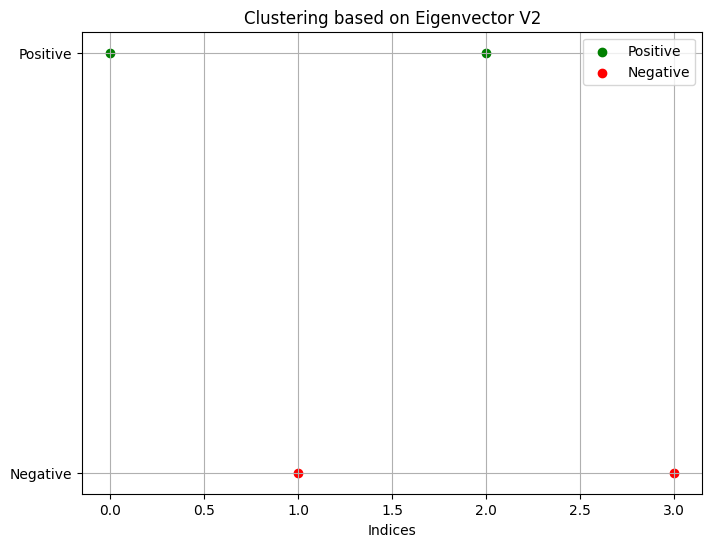

In [10]:
# Optional: Visualize the clusters
plt.figure(figsize=(8, 6))
plt.scatter(pos, [1]*len(pos), color='green', label='Positive')
plt.scatter(neg, [0]*len(neg), color='red', label='Negative')
plt.yticks([0, 1], ['Negative', 'Positive'])
plt.title('Clustering based on Eigenvector V2')
plt.xlabel('Indices')
plt.legend()
plt.grid()
plt.show()


Loaded Social adjacency matrix with shape: (351, 351)


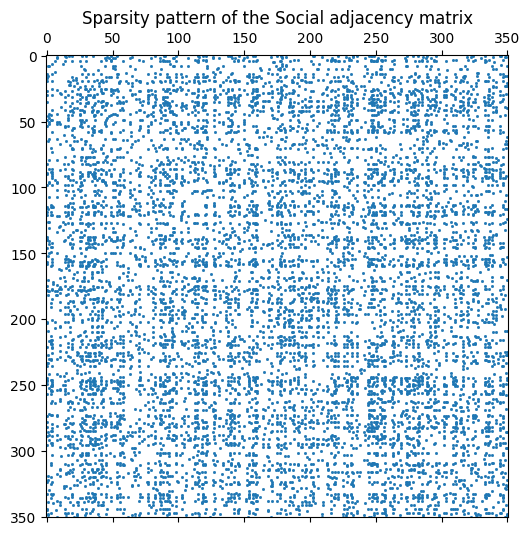

In [14]:
from scipy.io import loadmat

# 8. Load the data
file_path = "/content/social.mat"
data = loadmat(file_path)
Social = data['Social']

print("Loaded Social adjacency matrix with shape:", Social.shape)

# Spy plot of the Social matrix
plt.figure(figsize=(8, 6))
plt.spy(Social, markersize=1)
plt.title('Sparsity pattern of the Social adjacency matrix')
plt.show()

In [15]:
# 4. Find eigenvalues and eigenvectors using the eig function
D, V = np.linalg.eig(LaplaceGraph)

# Sort the eigenvalues and eigenvectors
d, ind = np.argsort(D), np.argsort(D)
D = np.diag(D[ind])
V = V[:, ind]

print("\nEigenvalues (sorted):")
print(np.diag(D))
print("\nEigenvectors (sorted):")
print(V)



Eigenvalues (sorted):
[-2.22044605e-16  2.00000000e+00  2.00000000e+00  4.00000000e+00]

Eigenvectors (sorted):
[[ 5.00000000e-01  4.08248290e-01  7.07106781e-01 -5.00000000e-01]
 [ 5.00000000e-01 -5.77350269e-01  4.80181756e-16  5.00000000e-01]
 [ 5.00000000e-01  5.77350269e-01 -1.77321568e-16  5.00000000e-01]
 [ 5.00000000e-01 -4.08248290e-01 -7.07106781e-01 -5.00000000e-01]]


In [16]:
# 5. Identify the second smallest eigenvalue and its corresponding eigenvector
second_smallest_eigenvalue = D[1, 1]
V2 = V[:, 1]

# Ensure V2 has a positive first entry
if V2[0] < 0:
    V2 = -V2

print("\nSecond Smallest Eigenvalue:")
print(second_smallest_eigenvalue)
print("\nEigenvector corresponding to the second smallest eigenvalue (V2):")
print(V2)



Second Smallest Eigenvalue:
1.9999999999999991

Eigenvector corresponding to the second smallest eigenvalue (V2):
[ 0.40824829 -0.57735027  0.57735027 -0.40824829]


In [17]:
# 6. Separate the elements of the eigenvector V2
pos = []
neg = []

for j in range(len(V2)):
    if V2[j] > 0:
        pos.append(j)
    else:
        neg.append(j)

print("\nPositive Indices (V2 > 0):")
print(pos)
print("\nNegative Indices (V2 <= 0):")
print(neg)



Positive Indices (V2 > 0):
[0, 2]

Negative Indices (V2 <= 0):
[1, 3]


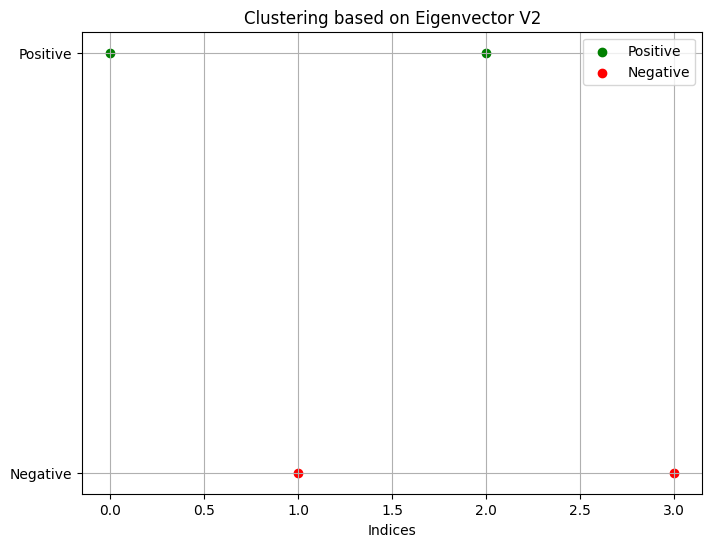

In [18]:
# Optional: Visualize the clusters
plt.figure(figsize=(8, 6))
plt.scatter(pos, [1]*len(pos), color='green', label='Positive')
plt.scatter(neg, [0]*len(neg), color='red', label='Negative')
plt.yticks([0, 1], ['Negative', 'Positive'])
plt.title('Clustering based on Eigenvector V2')
plt.xlabel('Indices')
plt.legend()
plt.grid()
plt.show()


Loaded Social adjacency matrix with shape: (351, 351)


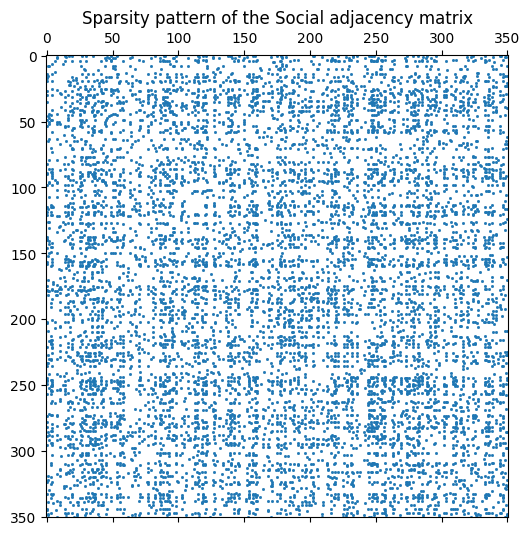

In [20]:
from scipy.io import loadmat

# 8. Load the data
# Replace "/content/social.mat" with the actual path to your social.mat file
data = loadmat("/content/social.mat")
Social = data['Social']

print("Loaded Social adjacency matrix with shape:", Social.shape)

# Spy plot of the Social matrix
plt.figure(figsize=(8, 6))
plt.spy(Social, markersize=1)
plt.title('Sparsity pattern of the Social adjacency matrix')
plt.show()

In [21]:
# 9. Define DiagSocial and LaplaceSocial
DiagSocial = np.sum(Social, axis=1)
LaplaceSocial = np.diag(DiagSocial) - Social

print("\nDiagonal matrix DiagSocial:")
print(DiagSocial)
print("\nLaplacian matrix LaplaceSocial:")
print(LaplaceSocial)



Diagonal matrix DiagSocial:
[42 19 25 36 50  5  7  2 29  5 28  5  4  8 38 17 47  4 29 49 28 17  7 23
  8 43 25 48 30 20 43 47  6 39 34 46 40 50 27 32 15 46 33 31 24 42 10  8
  6 44 26  5 24 47  6 24 50  7 56 11  4  4 15 24  9 21  7 22 23  5 40 36
  8  5  9  4  4 45  4 23  5 35 46  9  8  7 56 34 49  9 48 42  6 44 33 34
 29 24 50  4  8  4 21 43 28  6 21 26  5  8 23  3 27 51 42 48 18  7 31 50
 46 45 25  4  4  7 22 52 41  4  5 24 16  8 20  3 34  4 46 46 43 27 43 32
  4 42 42  4  5  4 26  7 20  7 51 26 32 48 42 55 48  6  6  7 28  6  7  4
 29 33 19 39  4  6  6 47 32 45 45 22 30 39 19  5 27 44 30 34 43  5  5 48
 19 26 35  7 50 31  6 31  6 34 51  7  6 29 32  5  4 18 29  4  5 38 32 11
 43 24 46 54 34 48  6  5  5 18 49 14 47 22 28 46 46 22  6  7 45  5  5  6
  6 16 23  6 41 43 49 50 40 48 41 44 23 31 27 40 46 52  5  5  5 27 25 44
 47  6  4 36 16 43  8  5  7 44 55 41  3 29 50 34 39 25 44 50  8 47 19  6
 21 46 40 34 22  6 48 28 41 29 18  3  5  6 52 44  8  6  5 18  6 42 44 45
  8  6 25 33 51 20  5 

In [22]:
# 10. Compute eigenvalues and eigenvectors
D, V = np.linalg.eig(LaplaceSocial)

# Sort the eigenvalues and eigenvectors
d, ind = np.argsort(D), np.argsort(D)
D = np.diag(D[ind])
V = V[:, ind]

print("\nEigenvalues (sorted):")
print(np.diag(D))
print("\nEigenvectors (sorted):")
print(V)



Eigenvalues (sorted):
[-1.96859959e+20 -1.92103673e+20 -1.78690854e+20 -1.77812416e+20
 -1.70974312e+20 -1.68924373e+20 -1.66323610e+20 -1.60434460e+20
 -1.58764568e+20 -1.54664298e+20 -1.54346568e+20 -1.50733606e+20
 -1.48395654e+20 -1.45802342e+20 -1.42473976e+20 -1.41051479e+20
 -1.39759708e+20 -1.36067037e+20 -1.32989250e+20 -1.30627279e+20
 -1.29622346e+20 -1.27772261e+20 -1.26506545e+20 -1.25359620e+20
 -1.24385691e+20 -1.22476777e+20 -1.21961380e+20 -1.19310553e+20
 -1.17555657e+20 -1.16676622e+20 -1.15147762e+20 -1.12611083e+20
 -1.11264532e+20 -1.08863119e+20 -1.06836903e+20 -1.05886658e+20
 -1.04273850e+20 -1.02333855e+20 -1.00452520e+20 -9.95439619e+19
 -9.90795197e+19 -9.77100904e+19 -9.72669383e+19 -9.59764127e+19
 -9.51165664e+19 -9.32902450e+19 -9.22227115e+19 -9.17487553e+19
 -9.08864537e+19 -8.84871177e+19 -8.69852886e+19 -8.54943960e+19
 -8.47512536e+19 -8.32773109e+19 -8.25965997e+19 -8.16414616e+19
 -8.13785671e+19 -7.93054944e+19 -7.80765752e+19 -7.75523877e+19
 -

In [23]:
# 11. Identify the second smallest eigenvalue and the corresponding eigenvector V2
second_smallest_eigenvalue = D[1, 1]
V2 = V[:, 1]

# Ensure V2 has a positive first entry
if V2[0] < 0:
    V2 = -V2

print("\nSecond Smallest Eigenvalue:")
print(second_smallest_eigenvalue)
print("\nEigenvector corresponding to the second smallest eigenvalue (V2):")
print(V2)

# Separate into positive and negative indices
pos = []
neg = []

for j in range(len(V2)):
    if V2[j] > 0:
        pos.append(j)
    else:
        neg.append(j)

print("\nPositive Indices (V2 > 0):")
print(pos)
print("\nNegative Indices (V2 <= 0):")
print(neg)



Second Smallest Eigenvalue:
-1.9210367262365683e+20

Eigenvector corresponding to the second smallest eigenvalue (V2):
[ 2.86912150e-03  1.81178076e-03  5.50859041e-03  1.94676779e-02
 -1.28609860e-01 -9.93712863e-04  4.04850090e-03 -2.43664212e-03
  2.27856350e-04  6.24695444e-03 -8.61295843e-03  4.65089406e-03
 -9.71796814e-03 -1.49755986e-02  1.95976684e-02 -3.69606931e-02
  2.70444780e-02 -2.63507512e-03 -1.15876235e-02 -1.09542447e-01
  6.59081818e-03  9.70729699e-03  3.40228265e-03 -8.17489204e-03
  2.03402952e-02 -1.93658576e-01  2.65073994e-02 -3.40863035e-02
  6.09699580e-04  7.79758397e-03  8.93789592e-03  5.57428370e-02
 -6.87508378e-03  6.34498858e-02  3.06756112e-02 -1.23087227e-01
  8.71866326e-02 -9.60165834e-03  2.57189329e-02 -8.97965518e-03
  5.84041334e-03  2.18775298e-01 -1.31553641e-02 -3.53919789e-02
 -9.46004681e-03  2.92699243e-02  3.99098246e-03 -1.64232016e-02
 -1.89728721e-02 -1.39130382e-02 -1.41059580e-02  2.50180396e-02
  2.74526716e-03 -9.18624698e-03  2

Shape of SocialOrdered: (351, 351)


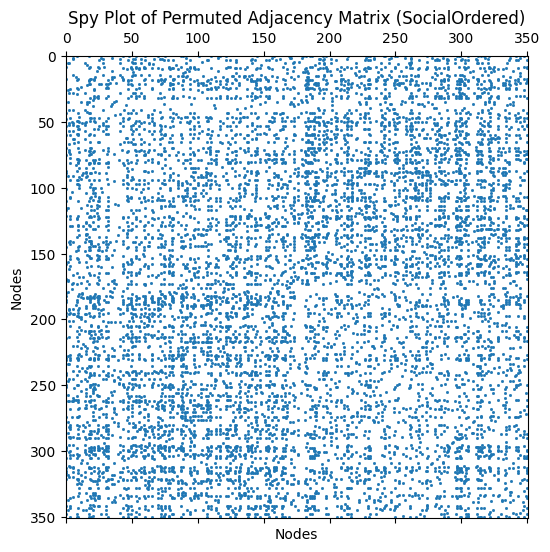

In [24]:
# 12. Permute the adjacency matrix Social using the permutation generated by the lists pos, neg
order = pos + neg  # Combine the positive and negative indices
m, n = Social.shape  # Get the shape of the Social matrix
iden = np.eye(m)  # Identity matrix of size m

# Create the permutation matrix P
P = np.zeros((m, m))
for j in range(m):
    for k in range(m):
        P[j, k] = iden[order[j], k]

# Permute the adjacency matrix
SocialOrdered = P @ Social @ P.T
print("Shape of SocialOrdered:", SocialOrdered.shape)

# Plot the permuted adjacency matrix
plt.figure(figsize=(8, 6))
plt.spy(SocialOrdered, markersize=1)  # Using a smaller marker size for better visibility
plt.title("Spy Plot of Permuted Adjacency Matrix (SocialOrdered)")
plt.xlabel("Nodes")
plt.ylabel("Nodes")
plt.grid(False)  # Disable the grid
plt.show()


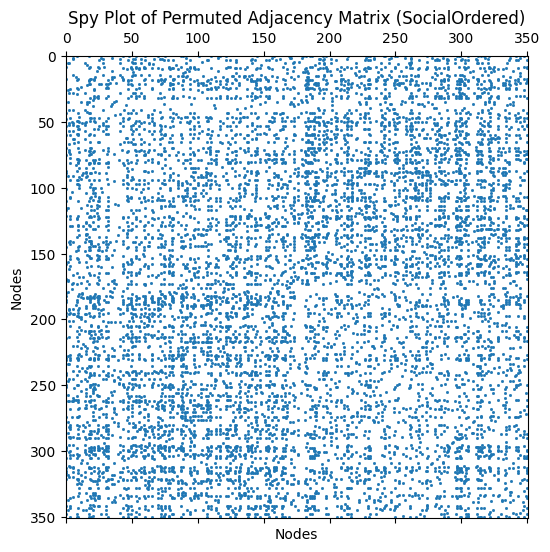

In [25]:
# Plot the permuted adjacency matrix SocialOrdered
plt.figure(figsize=(8, 6))
plt.spy(SocialOrdered, markersize=1)
plt.title("Spy Plot of Permuted Adjacency Matrix (SocialOrdered)")
plt.xlabel("Nodes")
plt.ylabel("Nodes")
plt.grid(False)  # Disable the grid
plt.show()


<module 'numpy' from '/usr/local/lib/python3.11/dist-packages/numpy/__init__.py'>
[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


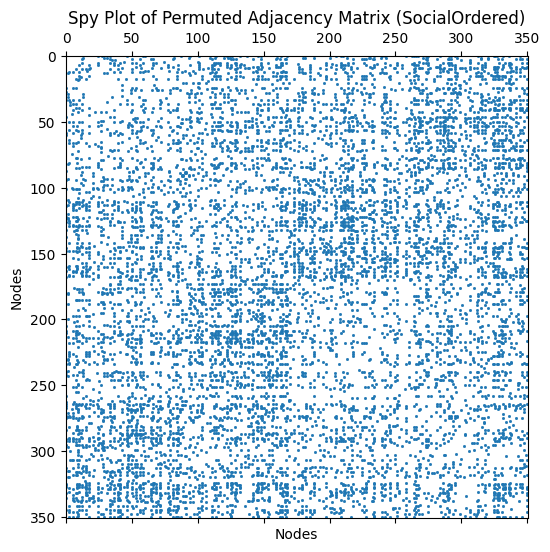

In [31]:
import numpy as np

# Check what np refers to
print(np)

# Now create the identity matrix
m = 10  # Example size
iden = np.eye(m)  # Identity matrix
print(iden)

import numpy as np  # Ensure numpy is properly imported
import matplotlib.pyplot as plt

# Assuming Social matrix and eigenvectors V2 and V3 are already defined

# Explore the third smallest eigenvalue for clustering
V3 = V[:, 2]  # Get the third eigenvector
if V3[0] < 0:  # Ensure V3 has a positive first entry
    V3 = -V3

# Initialize lists for the groups
pp = []  # ++ group
pn = []  # +- group
np_list = []  # -+ group, renamed to avoid conflict with numpy
nn = []  # -- group

# Grouping based on the signs of V2 and V3
for j in range(len(V2)):
    if V2[j] > 0:
        if V3[j] > 0:
            pp.append(j)
        else:
            pn.append(j)
    else:
        if V3[j] > 0:
            np_list.append(j) # Use the renamed list here
        else:
            nn.append(j)

# Combine the orders of the groups
order = pp + pn + np_list + nn # Use the renamed list here
m = len(Social)  # Get the size of Social
iden = np.eye(m)  # Identity matrix of size m, should work with numpy
P = np.zeros((m, m))  # Initialize permutation matrix

# Create the permutation matrix
for j in range(m):
    P[j, :] = iden[order[j], :]

# Permute the adjacency matrix
SocialOrdered = P @ Social @ P.T

# Plot the permuted adjacency matrix
plt.figure(figsize=(8, 6))
plt.spy(SocialOrdered, markersize=1)
plt.title("Spy Plot of Permuted Adjacency Matrix (SocialOrdered)")
plt.xlabel("Nodes")
plt.ylabel("Nodes")
plt.grid(False)  # Disable grid for clarity
plt.show()

In [32]:
# Step 15: Fiedler vector procedure iteratively for clusters

# Define SocialPos and SocialNeg based on the positive and negative indices
SocialPos = Social[np.ix_(pos, pos)]
SocialNeg = Social[np.ix_(neg, neg)]

# Calculate the Laplacian for the positive group
rowsumpos = np.sum(SocialPos, axis=1)
DiagSocialPos = np.diag(rowsumpos)
LaplaceSocialPos = DiagSocialPos - SocialPos

# Eigen decomposition for positive group
DPos, VPos = np.linalg.eig(LaplaceSocialPos)
d, ind = np.argsort(DPos), np.argsort(DPos)
DPos = np.diag(DPos[ind])
VPos = VPos[:, ind]
V2Pos = VPos[:, 1]  # Second smallest eigenvector for positive group

# Group positive nodes
posp = []  # Positive group
posn = []  # Negative group
for j in range(len(V2Pos)):
    if V2Pos[j] > 0:
        posp.append(pos[j])  # Append original index
    else:
        posn.append(pos[j])  # Append original index

# Calculate the Laplacian for the negative group
rowsumneg = np.sum(SocialNeg, axis=1)
DiagSocialNeg = np.diag(rowsumneg)
LaplaceSocialNeg = DiagSocialNeg - SocialNeg

# Eigen decomposition for negative group
DNeg, VNeg = np.linalg.eig(LaplaceSocialNeg)
d, ind = np.argsort(DNeg), np.argsort(DNeg)
DNeg = np.diag(DNeg[ind])
VNeg = VNeg[:, ind]
V2Neg = VNeg[:, 1]  # Second smallest eigenvector for negative group

# Group negative nodes
negp = []  # Positive group
negn = []  # Negative group
for j in range(len(V2Neg)):
    if V2Neg[j] > 0:
        negp.append(neg[j])  # Append original index
    else:
        negn.append(neg[j])  # Append original index

# The groups are now stored in posp, posn, negp, negn
print("\nClustering groups:")
print("posp:", posp)
print("posn:", posn)
print("negp:", negp)
print("negn:", negn)



Clustering groups:
posp: [0, 1, 2, 6, 8, 16, 20, 21, 24, 26, 30, 31, 34, 36, 38, 41, 51, 52, 54, 57, 60, 61, 67, 74, 75, 80, 84, 85, 88, 91, 97, 98, 99, 107, 108, 114, 115, 122, 130, 135, 138, 149, 154, 160, 163, 165, 172, 176, 178, 180, 191, 192, 193, 196, 205, 212, 214, 216, 220, 223, 225, 232, 235, 236, 241, 243, 248, 250, 255, 260, 261, 263, 267, 276, 277, 280, 285, 293, 294, 306, 307, 309, 310, 311, 319, 324, 325, 327, 331, 335, 340, 350]
posn: [3, 9, 11, 14, 22, 28, 29, 33, 40, 45, 46, 56, 58, 65, 69, 73, 79, 82, 87, 89, 94, 96, 103, 105, 117, 118, 124, 127, 131, 137, 141, 142, 143, 145, 146, 148, 156, 159, 161, 169, 175, 182, 186, 190, 197, 200, 201, 203, 207, 210, 219, 221, 222, 233, 240, 246, 262, 264, 265, 269, 270, 279, 283, 284, 292, 295, 296, 299, 303, 304, 305, 317, 321, 328, 330, 334, 338, 341, 345, 348, 349]
negp: [4, 12, 13, 15, 18, 19, 27, 35, 37, 43, 44, 48, 49, 50, 53, 55, 64, 66, 70, 76, 77, 78, 83, 86, 102, 104, 113, 128, 133, 136, 140, 144, 151, 152, 153, 158, 1